In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pygimli as pg
from pygimli.viewer.mpl import drawMesh, drawModel

In [1]:
# Create coarse and fine mesh with data

In [3]:
def create_mesh_and_data(n):
    nc = np.linspace(-2.0, 0.0, n)
    mesh = pg.meshtools.createMesh2D(nc, nc)
    mcx = pg.x(mesh.cellCenter())
    mcy = pg.y(mesh.cellCenter())
    data = np.cos(1.5 * mcx) * np.sin(1.5 * mcy)
    return mesh, data

coarse, coarse_data = create_mesh_and_data(5)
fine, fine_data = create_mesh_and_data(20)

In [4]:
coarse

In [5]:
coarse_data

array([ 0.42946725,  0.14794568, -0.21296683, -0.4595966 ,  0.82958444,
        0.28578066, -0.41137938, -0.88778409,  0.78452815,  0.27025938,
       -0.3890366 , -0.83956687,  0.31847659,  0.10971089, -0.15792811,
       -0.34081938])

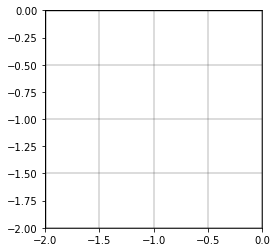

In [7]:
pg.viewer.show(coarse)
pg.wait()

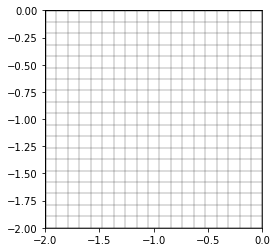

In [8]:
pg.viewer.show(fine)
pg.wait()

In [9]:
# Interpolate data to different meshes

In [10]:
# We define two functions

def nearest_neighbor_interpolation(inmesh, indata, outmesh, nan=99.9):
    """ Nearest neighbor interpolation. """
    outdata = []
    for pos in outmesh.cellCenters():
        cell = inmesh.findCell(pos)
        if cell:
            outdata.append(indata[cell.id()])
        else:
            outdata.append(nan)
    return outdata


def linear_interpolation(inmesh, indata, outmesh):
    """ Linear interpolation using `pg.interpolate()` """
    outdata = pg.Vector()  # empty
    pg.interpolate(srcMesh=inmesh, inVec=indata,
                   destPos=outmesh.cellCenters(), outVec=outdata)

    # alternatively you can use the interpolation matrix
    outdata = inmesh.interpolationMatrix(outmesh.cellCenters()) * \
              pg.core.cellDataToPointData(inmesh, indata)
    return outdata

In [11]:
# Visualization

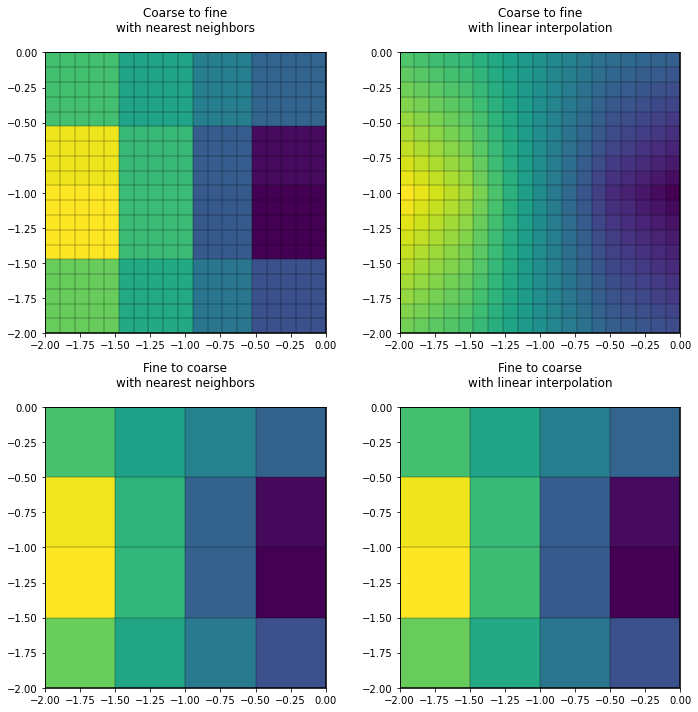

In [14]:
meshes = [coarse, fine]
datasets = [coarse_data, fine_data]
ints = [nearest_neighbor_interpolation,
        linear_interpolation]

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Coarse data to fine mesh
drawModel(ax[0, 0], fine, ints[0](coarse, coarse_data, fine), showCbar=False)
drawMesh(ax[0, 0], fine)
drawModel(ax[0, 1], fine, ints[1](coarse, coarse_data, fine), showCbar=False)
drawMesh(ax[0, 1], fine)

# Fine data to coarse mesh
drawModel(ax[1, 0], coarse, ints[0](fine, fine_data, coarse), showCbar=False)
drawMesh(ax[1, 0], coarse)
drawModel(ax[1, 1], coarse, ints[1](fine, fine_data, coarse), showCbar=False)
drawMesh(ax[1, 1], coarse)

titles = ["Coarse to fine\nwith nearest neighbors",
          "Coarse to fine\nwith linear interpolation",
          "Fine to coarse\nwith nearest neighbors",
          "Fine to coarse\nwith linear interpolation"]

for a, title in zip(ax.flat, titles):
    a.set_title(title + "\n")

fig.tight_layout()
plt.show()